In [1]:
import os
import pandas as pd

# Defina o caminho da pasta onde os arquivos estão localizados
pasta_dados = "data"

# Usina que queremos manter
usina_selecionada = 'Caetité 2'

# Lista de arquivos na pasta
arquivos = [arquivo for arquivo in os.listdir(pasta_dados) if arquivo.endswith(".csv")]

# Loop através dos arquivos na pasta
for arquivo in arquivos:
    caminho_arquivo = os.path.join(pasta_dados, arquivo)

    # Leitura do arquivo CSV
    df = pd.read_csv(caminho_arquivo, delimiter=";", encoding="utf-8", decimal=".")

    # Filtra os dados para manter apenas as linhas onde 'nom_usina' seja 'Macaúbas'
    df_filtrado = df[df['nom_usina'] == usina_selecionada]

    # Salva o DataFrame filtrado novamente no arquivo CSV
    df_filtrado.to_csv(caminho_arquivo, sep=";", index=False, encoding="utf-8", decimal=".")

Contagem de dados por mês:
din_instante
2021-10-31    1488
2021-11-30    1440
2021-12-31    1488
2022-01-31    1488
2022-02-28    1344
2022-03-31    1488
2022-04-30    1440
2022-05-31    1488
2022-06-30    1440
2022-07-31    1488
2022-08-31    1488
2022-09-30    1440
2022-10-31    1488
2022-11-30    1440
2022-12-31    1488
2023-01-31    1488
2023-02-28    1344
2023-03-31    1488
2023-04-30    1440
2023-05-31    1488
2023-06-30    1440
2023-07-31    1488
2023-08-31    1488
2023-09-30    1440
Freq: ME, Name: val_ventoverificado, dtype: int64


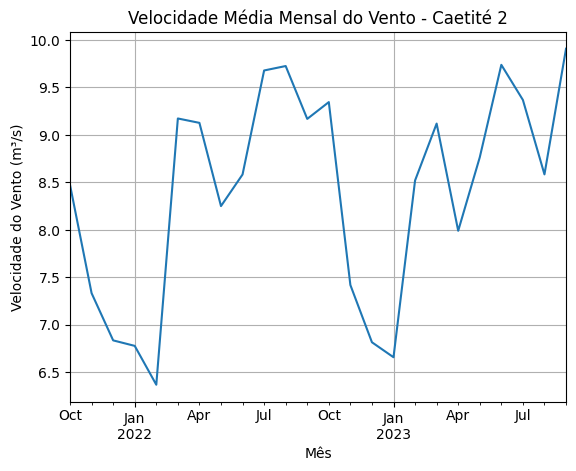

Usina: Caetité 2
Sazonalidade: True
Média mensal da velocidade do vento e contagem de dados usados:
              Média Mensal  Contagem de Dados
din_instante                                 
2021-10-31        8.471214               1488
2021-11-30        7.330668               1440
2021-12-31        6.833040               1488
2022-01-31        6.775069               1488
2022-02-28        6.365618               1344
2022-03-31        9.172316               1488
2022-04-30        9.126074               1440
2022-05-31        8.248792               1488
2022-06-30        8.581792               1440
2022-07-31        9.678258               1488
2022-08-31        9.725149               1488
2022-09-30        9.167860               1440
2022-10-31        9.344995               1488
2022-11-30        7.416756               1440
2022-12-31        6.813141               1488
2023-01-31        6.655280               1488
2023-02-28        8.518781               1344
2023-03-31        9.118467

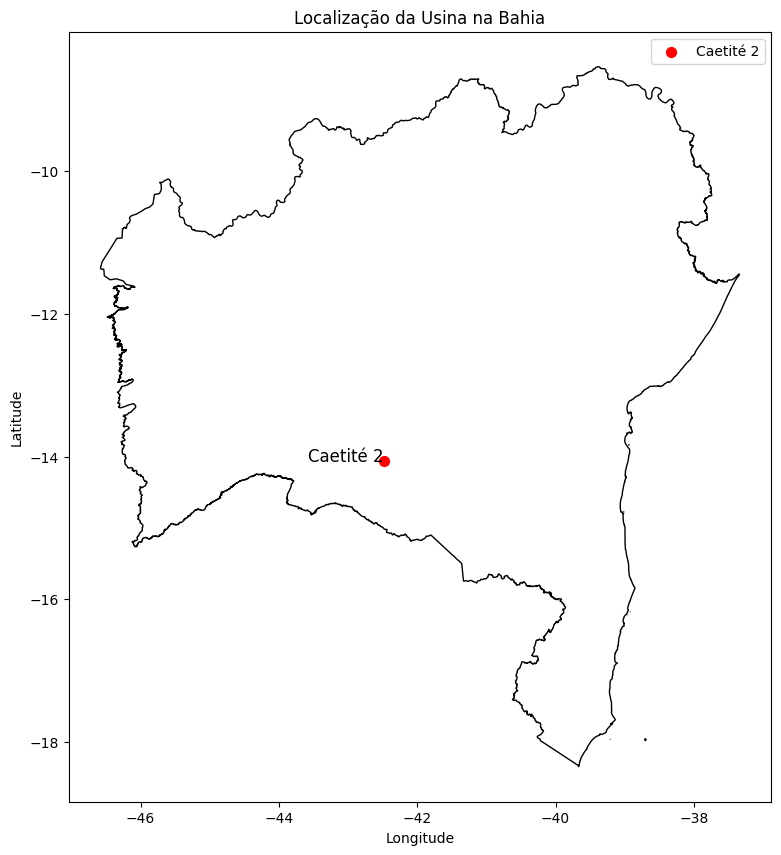

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geobr import read_state

# Defina o caminho da pasta onde os arquivos estão localizados
pasta_dados = "data"

# Lista todos os arquivos na pasta
arquivos = [arquivo for arquivo in os.listdir(pasta_dados) if arquivo.endswith(".csv")]

# Variável para contar o número total de registros da usina selecionada
total_registros_usina = 0

# Nome da usina selecionada
usina_selecionada = 'Caetité 2'

# DataFrame para armazenar os dados da usina selecionada
dados_usina = pd.DataFrame()

# Leitura e processamento dos arquivos
for arquivo in arquivos:
    caminho_arquivo = os.path.join(pasta_dados, arquivo)
    df = pd.read_csv(caminho_arquivo, delimiter=";", encoding="utf-8", decimal=",")
    
    # Filtra os dados para a usina selecionada
    df = df[df['nom_usina'] == usina_selecionada]
    if not df.empty:
        # Converte as colunas para os tipos apropriados
        df['din_instante'] = pd.to_datetime(df['din_instante'], format="%Y-%m-%d %H:%M:%S")
        df['val_ventoverificado'] = pd.to_numeric(df['val_ventoverificado'], errors='coerce')
        
        # Adiciona os dados ao DataFrame principal
        dados_usina = pd.concat([dados_usina, df])

        # Atualiza a contagem total de registros da usina selecionada
        total_registros_usina += len(df)

# Remover valores nulos na coluna 'val_ventoverificado'
dados_usina = dados_usina.dropna(subset=['val_ventoverificado'])

# Verificar se há dados suficientes
if not dados_usina.empty:
    # Calcular média mensal da velocidade do vento
    dados_usina.set_index('din_instante', inplace=True)
    media_mensal_vento = dados_usina['val_ventoverificado'].resample('ME').mean()

    # Identificação de sazonalidade
    sazonalidade = len(media_mensal_vento.dropna()) > 4

    # Mostrar a contagem de dados usados em cada cálculo de média mensal
    contagem_mensal = dados_usina['val_ventoverificado'].resample('ME').count()
    print("Contagem de dados por mês:")
    print(contagem_mensal)

    # Plot da média mensal da velocidade do vento
    media_mensal_vento.plot(title=f"Velocidade Média Mensal do Vento - {usina_selecionada}")
    plt.xlabel("Mês")
    plt.ylabel("Velocidade do Vento (m³/s)")
    plt.grid(True)
    plt.show()

    print(f"Usina: {usina_selecionada}")
    print(f"Sazonalidade: {sazonalidade}")

    # Exibir médias mensais e contagens para verificação
    df_mensal = pd.DataFrame({'Média Mensal': media_mensal_vento, 'Contagem de Dados': contagem_mensal})
    print("Média mensal da velocidade do vento e contagem de dados usados:")
    print(df_mensal)
else:
    print(f"Usina {usina_selecionada} não possui dados suficientes.")

# Exibir o número total de registros da usina selecionada
print(f"Número total de registros para a usina {usina_selecionada}: {total_registros_usina}")

# Visualização da distribuição geográfica
# Carregar mapa da Bahia
bahia = read_state(code_state='BA', year=2019)

# Coordenadas específicas para Caetité 2
coordenadas_usina = (-42.4869, -14.0684)  # Coordenadas reais de Macaúbas

# Criar GeoDataFrame para a usina
gdf_usina = gpd.GeoDataFrame([{'usina': usina_selecionada}], geometry=[Point(coordenadas_usina)], crs="EPSG:4326")

# Garantir que o mapa da Bahia também esteja em EPSG:4326
bahia = bahia.to_crs(epsg=4326)

# Plot do mapa com a usina
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bahia.plot(ax=ax, color='white', edgecolor='black')
gdf_usina.plot(ax=ax, marker='o', color='red', markersize=50, label=usina_selecionada)

# Adicionar texto para a usina
for x, y, label in zip(gdf_usina.geometry.x, gdf_usina.geometry.y, gdf_usina['usina']):
    plt.text(x, y, label, fontsize=12, ha='right')

# Adicionar título e legendas
plt.title("Localização da Usina na Bahia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right')

# Mostrar o mapa
plt.show()

In [3]:
import os
import pandas as pd

# Função para determinar a estação do ano
def EstacaoAno(dia, mes):
    if mes in (1, 2):
        return 'VERAO'
    elif mes == 3:
        if dia < 21:
            return 'VERAO'
        else:
            return 'OUTONO'
    elif mes in (4, 5):
        return 'OUTONO'
    elif mes == 6:
        if dia < 21:
            return 'OUTONO'
        else:
            return 'INVERNO'
    elif mes in (7, 8):
        return 'INVERNO'
    elif mes == 9:
        if dia < 21:
            return 'INVERNO'
        else:
            return 'PRIMAVERA'
    elif mes in (10, 11):
        return 'PRIMAVERA'
    elif mes == 12:
        if dia < 21:
            return 'PRIMAVERA'
        else:
            return 'VERAO'

# Definir o caminho da pasta onde os arquivos estão localizados
pasta_dados = "data"

# Lista todos os arquivos na pasta
arquivos = [arquivo for arquivo in sorted(os.listdir(pasta_dados)) if arquivo.endswith(".csv")]

# Nome da usina selecionada
usina_selecionada = 'Caetité 2'

# DataFrame para armazenar os dados da usina selecionada
dados_usina = pd.DataFrame()

# Leitura e processamento dos arquivos
for arquivo in arquivos:
    caminho_arquivo = os.path.join(pasta_dados, arquivo)
    df = pd.read_csv(caminho_arquivo, delimiter=";", encoding="utf-8", decimal=",")
    
    # Filtra os dados para a usina selecionada
    df = df[df['nom_usina'] == usina_selecionada]
    if not df.empty:
        # Converte as colunas para os tipos apropriados
        df['din_instante'] = pd.to_datetime(df['din_instante'], format="%Y-%m-%d %H:%M:%S")
        df['val_ventoverificado'] = pd.to_numeric(df['val_ventoverificado'], errors='coerce')
        
        # Adiciona os dados ao DataFrame principal
        dados_usina = pd.concat([dados_usina, df])

# Remover valores nulos na coluna 'val_ventoverificado'
dados_usina = dados_usina.dropna(subset=['val_ventoverificado'])

# Verificar se há dados suficientes
if not dados_usina.empty:
    # Adicionar colunas de semi-horas
    time_columns = ['00_00', '00_30', '01_00', '01_30', '02_00', '02_30', '03_00', '03_30', '04_00', '04_30',
                    '05_00', '05_30', '06_00', '06_30', '07_00', '07_30', '08_00', '08_30', '09_00', '09_30',
                    '10_00', '10_30', '11_00', '11_30', '12_00', '12_30', '13_00', '13_30', '14_00', '14_30',
                    '15_00', '15_30', '16_00', '16_30', '17_00', '17_30', '18_00', '18_30', '19_00', '19_30',
                    '20_00', '20_30', '21_00', '21_30', '22_00', '22_30', '23_00', '23_30']

    # Criar um DataFrame temporário para armazenar dados agrupados por dia
    df_temp = dados_usina.set_index('din_instante')
    df_temp['time'] = df_temp.index.time
    df_temp['date'] = df_temp.index.date

    # Pivotar os dados para que cada linha represente um dia e cada coluna uma semi-hora
    df_pivot = df_temp.pivot_table(index='date', columns='time', values='val_ventoverificado', aggfunc='first')

    # Verificar se o número de colunas está correto
    missing_columns = set(pd.to_datetime(time_columns, format='%H_%M').time) - set(df_pivot.columns)
    for col in missing_columns:
        df_pivot[col] = None

    # Reordenar as colunas de acordo com a ordem desejada
    df_pivot = df_pivot.reindex(columns=pd.to_datetime(time_columns, format='%H_%M').time)

    # Converter os nomes das colunas de volta para o formato de string
    df_pivot.columns = [col.strftime('%H_%M') for col in df_pivot.columns]

# Converter o índice para datetime64 e adicionar coluna de data
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot['din_medicao'] = df_pivot.index.strftime('%Y%m%d')

# Adicionar coluna de Usina
df_pivot['Usina'] = usina_selecionada

# Adicionar coluna de estação do ano
df_pivot['EstacaoAno'] = [EstacaoAno(date.day, date.month) for date in df_pivot.index]

# Criar colunas dummy para cada estação do ano
# Obs: não foi usado
estacoes_dummy = pd.get_dummies(df_pivot['EstacaoAno'])

# Ajustar os valores das colunas dummy para 1 ou 0
for col in estacoes_dummy.columns:
    estacoes_dummy[col] = estacoes_dummy[col].apply(lambda x: 1 if x == 1 else 0)  # Correção aqui

# Atualizar o DataFrame final com as colunas dummy
df_final = pd.concat([df_pivot, estacoes_dummy], axis=1)

# Reordenar colunas
colunas_ordenadas = ['din_medicao'] + time_columns + ['Usina', 'EstacaoAno'] + list(estacoes_dummy.columns)
df_final = df_final.reindex(columns=colunas_ordenadas)

# Exibir DataFrame final
print(df_final)

# Salvar o novo DataFrame em um arquivo CSV
caminho_saida = "dados_usina_caetite2_tratados.csv"
df_final.to_csv(caminho_saida, index=False)

           din_medicao   00_00   00_30   01_00   01_30   02_00   02_30  \
date                                                                     
2021-10-01    20211001   8.983   9.811  10.676  11.326  11.327  10.900   
2021-10-02    20211002   9.245  10.545  10.844  11.237  11.606  11.428   
2021-10-03    20211003   5.941   6.744   5.764   6.508   8.106   7.537   
2021-10-04    20211004   8.380   9.078   8.444   8.348   8.580   8.818   
2021-10-05    20211005  12.124  11.947  11.971  10.631   8.753   8.217   
...                ...     ...     ...     ...     ...     ...     ...   
2023-09-26    20230926   7.864   7.645   7.759   8.364   8.282   8.419   
2023-09-27    20230927  10.551   9.820   8.001   8.501   7.654   7.575   
2023-09-28    20230928   4.998   3.558   3.069   4.362   5.859   6.949   
2023-09-29    20230929   7.275   8.587   9.836  10.002   9.241  10.492   
2023-09-30    20230930  16.386  14.834  14.735  14.807  14.774  14.308   

             03_00   03_30   04_00  .

2024-06-13 23:11:38.404208: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 23:11:38.406019: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 23:11:38.477318: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-13 23:11:38.766402: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 23:11:40.406006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Epoch 1/50
12/12 - 1s - 118ms/step - loss: 0.2070
Epoch 2/50
12/12 - 0s - 5ms/step - loss: 0.1172
Epoch 3/50
12/12 - 0s - 6ms/step - loss: 0.0555
Epoch 4/50
12/12 - 0s - 5ms/step - loss: 0.0364
Epoch 5/50
12/12 - 0s - 5ms/step - loss: 0.0304
Epoch 6/50
12/12 - 0s - 11ms/step - loss: 0.0286
Epoch 7/50
12/12 - 0s - 6ms/step - loss: 0.0276
Epoch 8/50
12/12 - 0s - 11ms/step - loss: 0.0267
Epoch 9/50
12/12 - 0s - 4ms/step - loss: 0.0259
Epoch 10/50
12/12 - 0s - 5ms/step - loss: 0.0254
Epoch 11/50
12/12 - 0s - 5ms/step - loss: 0.0247
Epoch 12/50
12/12 - 0s - 6ms/step - loss: 0.0242
Epoch 13/50
12/12 - 0s - 4ms/step - loss: 0.0237
Epoch 14/50
12/12 - 0s - 12ms/step - loss: 0.0233
Epoch 15/50
12/12 - 0s - 4ms/step - loss: 0.0230
Epoch 16/50
12/12 - 0s - 6ms/step - loss: 0.0228
Epoch 17/50
12/12 - 0s - 5ms/step - loss: 0.0227
Epoch 18/50
12/12 - 0s - 5ms/step - loss: 0.0225
Epoch 19/50
12/12 - 0s - 12ms/step - loss: 0.0225
Epoch 20/50
12/12 - 0s - 12ms/step - loss: 0.0221
Epoch 21/50
12/12 - 0s

/home/saimon/tcc-windmodel/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 - 1s - 118ms/step - loss: 0.2174
Epoch 2/50
12/12 - 0s - 7ms/step - loss: 0.1454
Epoch 3/50
12/12 - 0s - 6ms/step - loss: 0.0697
Epoch 4/50
12/12 - 0s - 10ms/step - loss: 0.0408
Epoch 5/50
12/12 - 0s - 4ms/step - loss: 0.0323
Epoch 6/50
12/12 - 0s - 9ms/step - loss: 0.0298
Epoch 7/50
12/12 - 0s - 8ms/step - loss: 0.0289
Epoch 8/50
12/12 - 0s - 13ms/step - loss: 0.0276
Epoch 9/50
12/12 - 0s - 11ms/step - loss: 0.0269
Epoch 10/50
12/12 - 0s - 6ms/step - loss: 0.0259
Epoch 11/50
12/12 - 0s - 4ms/step - loss: 0.0253
Epoch 12/50
12/12 - 0s - 5ms/step - loss: 0.0248
Epoch 13/50
12/12 - 0s - 12ms/step - loss: 0.0245
Epoch 14/50
12/12 - 0s - 7ms/step - loss: 0.0236
Epoch 15/50
12/12 - 0s - 11ms/step - loss: 0.0231
Epoch 16/50
12/12 - 0s - 6ms/step - loss: 0.0228
Epoch 17/50
12/12 - 0s - 6ms/step - loss: 0.0226
Epoch 18/50
12/12 - 0s - 5ms/step - loss: 0.0223
Epoch 19/50
12/12 - 0s - 6ms/step - loss: 0.0222
Epoch 20/50
12/12 - 0s - 5ms/step - loss: 0.0220
Epoch 21/50
12/12 - 0s - 7ms/step

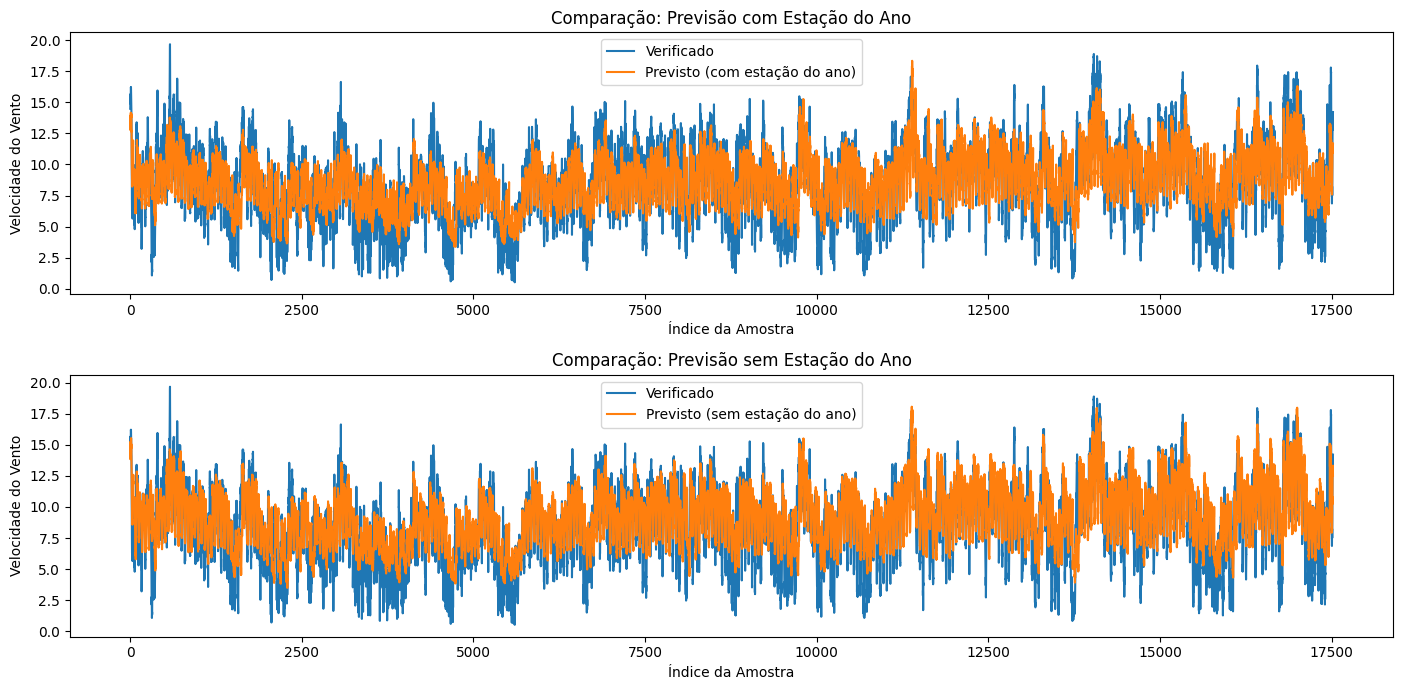

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


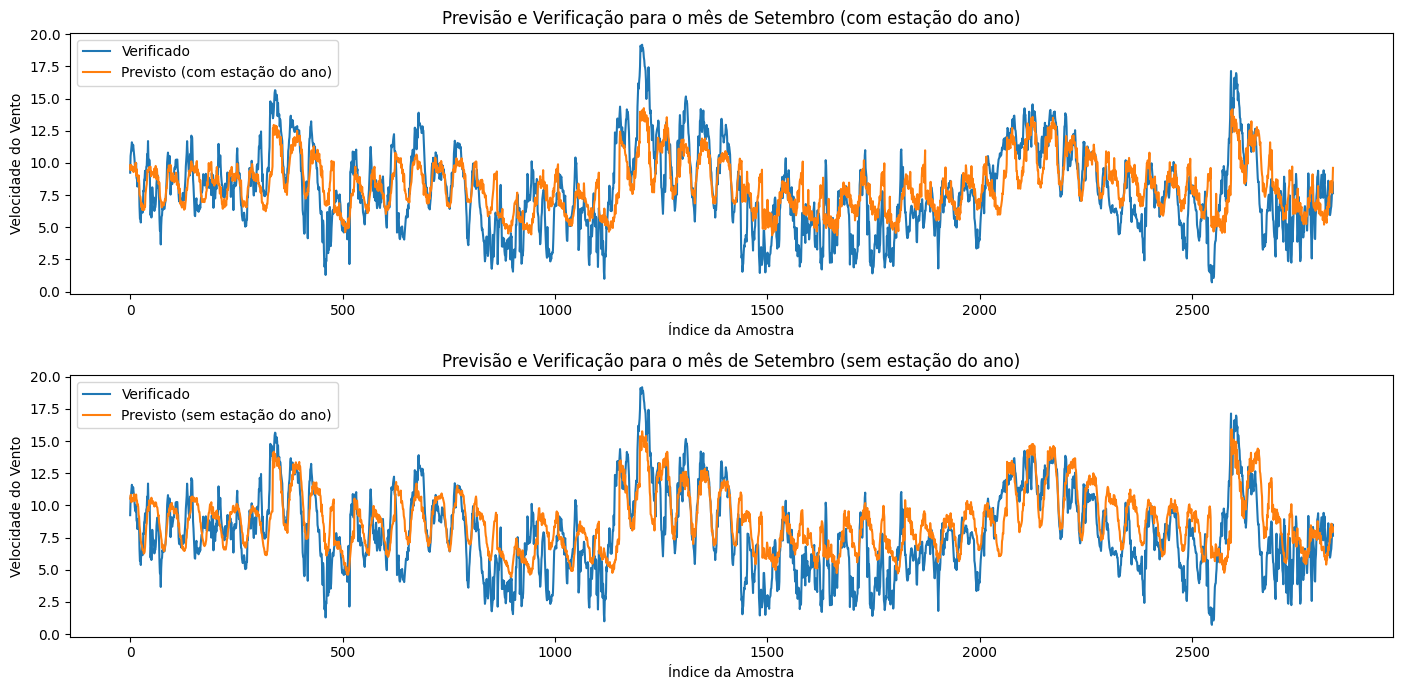

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Leitura dos dados
df = pd.read_csv('dados_usina_caetite2_tratados.csv')

# Normalização dos dados de velocidade do vento
scaler = MinMaxScaler()
wind_speeds = df.iloc[:, 1:49].values
wind_speeds_scaled = scaler.fit_transform(wind_speeds)

# Codificação one-hot para as estações do ano
encoder = OneHotEncoder(sparse_output=False)
estacoes = encoder.fit_transform(df[['EstacaoAno']])

# Conversão de 'din_medicao' para datetime
df['din_medicao'] = pd.to_datetime(df['din_medicao'], format='%Y%m%d')

# Normalização do dia da coleta
min_date = df['din_medicao'].min()
max_date = df['din_medicao'].max()

# Preparação dos dados para LSTM (com estação do ano)
X_with_season = []
y = []
for i in range(len(wind_speeds_scaled) - 1):
    dia_coleta = df.iloc[i, 0]
    dia_coleta_normalizado = (dia_coleta - min_date).days / (max_date - min_date).days
    features_with_season = np.concatenate([wind_speeds_scaled[i], estacoes[i], [dia_coleta_normalizado]])
    X_with_season.append(features_with_season)
    y.append(wind_speeds_scaled[i + 1])

X_with_season = np.array(X_with_season, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Divisão dos dados em treino e teste
X_train_with_season, X_test_with_season, y_train, y_test = train_test_split(X_with_season, y, test_size=0.5, shuffle=False)

# Ajuste das dimensões para o modelo LSTM
X_train_with_season = X_train_with_season.reshape((X_train_with_season.shape[0], 1, X_train_with_season.shape[1]))
X_test_with_season = X_test_with_season.reshape((X_test_with_season.shape[0], 1, X_test_with_season.shape[1]))

# Construção do modelo LSTM com estação do ano
model_with_season = Sequential()
model_with_season.add(LSTM(50, activation='relu', input_shape=(1, X_train_with_season.shape[2])))
model_with_season.add(Dense(48))
model_with_season.compile(optimizer='adam', loss='mse')

# Treinamento do modelo com estação do ano
model_with_season.fit(X_train_with_season, y_train, epochs=50, batch_size=32, verbose=2)

# Previsão com estação do ano
y_pred_with_season = model_with_season.predict(X_test_with_season)

# Transformação inversa para os valores originais
y_pred_with_season_inv = scaler.inverse_transform(y_pred_with_season)
y_test_inv = scaler.inverse_transform(y_test)

# Preparação dos dados para LSTM (sem estação do ano)
X_without_season = []
for i in range(len(wind_speeds_scaled) - 1):
    dia_coleta = df.iloc[i, 0]
    dia_coleta_normalizado = (dia_coleta - min_date).days / (max_date - min_date).days
    features_without_season = np.concatenate([wind_speeds_scaled[i], [dia_coleta_normalizado]])
    X_without_season.append(features_without_season)

X_without_season = np.array(X_without_season, dtype=np.float32)

# Divisão dos dados em treino e teste
X_train_without_season, X_test_without_season, _, _ = train_test_split(X_without_season, y, test_size=0.5, shuffle=False)

# Ajuste das dimensões para o modelo LSTM
X_train_without_season = X_train_without_season.reshape((X_train_without_season.shape[0], 1, X_train_without_season.shape[1]))
X_test_without_season = X_test_without_season.reshape((X_test_without_season.shape[0], 1, X_test_without_season.shape[1]))

# Construção do modelo LSTM sem estação do ano
model_without_season = Sequential()
model_without_season.add(LSTM(50, activation='relu', input_shape=(1, X_train_without_season.shape[2])))
model_without_season.add(Dense(48))
model_without_season.compile(optimizer='adam', loss='mse')

# Treinamento do modelo sem estação do ano
model_without_season.fit(X_train_without_season, y_train, epochs=50, batch_size=32, verbose=2)

# Previsão sem estação do ano
y_pred_without_season = model_without_season.predict(X_test_without_season)

# Transformação inversa para os valores originais
y_pred_without_season_inv = scaler.inverse_transform(y_pred_without_season)

# Plotagem dos resultados
plt.figure(figsize=(14, 7))

# Comparação do modelo com estação do ano
plt.subplot(2, 1, 1)
plt.plot(range(len(y_test_inv.flatten())), y_test_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_with_season_inv.flatten())), y_pred_with_season_inv.flatten(), label='Previsto (com estação do ano)')
plt.legend()
plt.title('Comparação: Previsão com Estação do Ano')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

# Comparação do modelo sem estação do ano
plt.subplot(2, 1, 2)
plt.plot(range(len(y_test_inv.flatten())), y_test_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_without_season_inv.flatten())), y_pred_without_season_inv.flatten(), label='Previsto (sem estação do ano)')
plt.legend()
plt.title('Comparação: Previsão sem Estação do Ano')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

plt.tight_layout()
plt.show()

# Filtragem dos dados para o mês de Setembro
df_september = df[df['din_medicao'].dt.month == 9]

# Preparação dos dados para o mês de Setembro
X_september_with_season = []
X_september_without_season = []
y_september = []
for i in range(len(df_september) - 1):
    dia_coleta = df_september.iloc[i, 0]
    dia_coleta_normalizado = (dia_coleta - min_date).days / (max_date - min_date).days
    features_with_season = np.concatenate([wind_speeds_scaled[i], estacoes[i], [dia_coleta_normalizado]])
    features_without_season = np.concatenate([wind_speeds_scaled[i], [dia_coleta_normalizado]])
    X_september_with_season.append(features_with_season)
    X_september_without_season.append(features_without_season)
    y_september.append(wind_speeds_scaled[i + 1])

X_september_with_season = np.array(X_september_with_season, dtype=np.float32)
X_september_without_season = np.array(X_september_without_season, dtype=np.float32)
y_september = np.array(y_september, dtype=np.float32)

# Ajuste das dimensões para o modelo LSTM
X_september_with_season = X_september_with_season.reshape((X_september_with_season.shape[0], 1, X_september_with_season.shape[1]))
X_september_without_season = X_september_without_season.reshape((X_september_without_season.shape[0], 1, X_september_without_season.shape[1]))

# Previsão para o mês de Setembro com estação do ano
y_pred_september_with_season = model_with_season.predict(X_september_with_season)

# Previsão para o mês de Setembro sem estação do ano
y_pred_september_without_season = model_without_season.predict(X_september_without_season)

# Transformação inversa para os valores originais
y_pred_september_with_season_inv = scaler.inverse_transform(y_pred_september_with_season)
y_pred_september_without_season_inv = scaler.inverse_transform(y_pred_september_without_season)
y_september_inv = scaler.inverse_transform(y_september)

# Plotagem dos resultados para Setembro com estação do ano
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(range(len(y_september_inv.flatten())), y_september_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_september_with_season_inv.flatten())), y_pred_september_with_season_inv.flatten(), label='Previsto (com estação do ano)')
plt.legend()
plt.title('Previsão e Verificação para o mês de Setembro (com estação do ano)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

# Plotagem dos resultados para Setembro sem estação do ano
plt.subplot(2, 1, 2)
plt.plot(range(len(y_september_inv.flatten())), y_september_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_september_without_season_inv.flatten())), y_pred_september_without_season_inv.flatten(), label='Previsto (sem estação do ano)')
plt.legend()
plt.title('Previsão e Verificação para o mês de Setembro (sem estação do ano)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

plt.tight_layout()
plt.show()

2024-06-16 19:10:36.771947: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 19:10:36.775530: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 19:10:36.936865: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 19:10:37.720173: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 19:10:40.469526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Epoch 1/100
12/12 - 2s - 164ms/step - loss: 0.2029
Epoch 2/100
12/12 - 0s - 4ms/step - loss: 0.1118
Epoch 3/100
12/12 - 0s - 5ms/step - loss: 0.0471
Epoch 4/100
12/12 - 0s - 3ms/step - loss: 0.0292
Epoch 5/100
12/12 - 0s - 7ms/step - loss: 0.0255
Epoch 6/100
12/12 - 0s - 11ms/step - loss: 0.0249
Epoch 7/100
12/12 - 0s - 4ms/step - loss: 0.0244
Epoch 8/100
12/12 - 0s - 7ms/step - loss: 0.0240
Epoch 9/100
12/12 - 0s - 11ms/step - loss: 0.0238
Epoch 10/100
12/12 - 0s - 6ms/step - loss: 0.0236
Epoch 11/100
12/12 - 0s - 6ms/step - loss: 0.0235
Epoch 12/100
12/12 - 0s - 4ms/step - loss: 0.0234
Epoch 13/100
12/12 - 0s - 5ms/step - loss: 0.0232
Epoch 14/100
12/12 - 0s - 6ms/step - loss: 0.0231
Epoch 15/100
12/12 - 0s - 6ms/step - loss: 0.0230
Epoch 16/100
12/12 - 0s - 6ms/step - loss: 0.0228
Epoch 17/100
12/12 - 0s - 4ms/step - loss: 0.0226
Epoch 18/100
12/12 - 0s - 7ms/step - loss: 0.0225
Epoch 19/100
12/12 - 0s - 4ms/step - loss: 0.0223
Epoch 20/100
12/12 - 0s - 11ms/step - loss: 0.0223
Epoc

/home/saimon/tcc-windmodel/venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 - 1s - 96ms/step - loss: 0.2033
Epoch 2/100
12/12 - 0s - 8ms/step - loss: 0.1246
Epoch 3/100
12/12 - 0s - 7ms/step - loss: 0.0656
Epoch 4/100
12/12 - 0s - 7ms/step - loss: 0.0356
Epoch 5/100
12/12 - 0s - 6ms/step - loss: 0.0266
Epoch 6/100
12/12 - 0s - 11ms/step - loss: 0.0250
Epoch 7/100
12/12 - 0s - 6ms/step - loss: 0.0245
Epoch 8/100
12/12 - 0s - 5ms/step - loss: 0.0241
Epoch 9/100
12/12 - 0s - 5ms/step - loss: 0.0239
Epoch 10/100
12/12 - 0s - 11ms/step - loss: 0.0238
Epoch 11/100
12/12 - 0s - 6ms/step - loss: 0.0236
Epoch 12/100
12/12 - 0s - 12ms/step - loss: 0.0234
Epoch 13/100
12/12 - 0s - 6ms/step - loss: 0.0233
Epoch 14/100
12/12 - 0s - 4ms/step - loss: 0.0232
Epoch 15/100
12/12 - 0s - 5ms/step - loss: 0.0230
Epoch 16/100
12/12 - 0s - 6ms/step - loss: 0.0229
Epoch 17/100
12/12 - 0s - 6ms/step - loss: 0.0228
Epoch 18/100
12/12 - 0s - 5ms/step - loss: 0.0227
Epoch 19/100
12/12 - 0s - 6ms/step - loss: 0.0226
Epoch 20/100
12/12 - 0s - 4ms/step - loss: 0.0225
Epoch 21/100
12/1

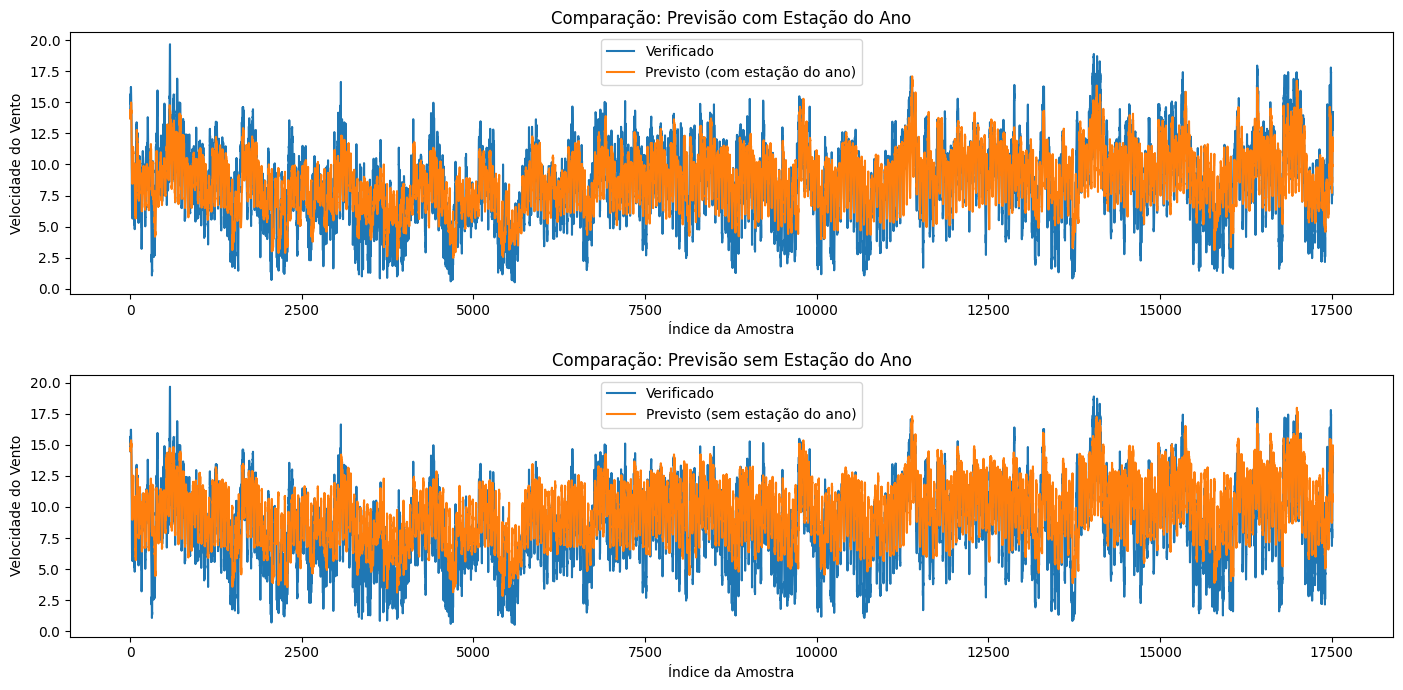

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Erro para o mês de Setembro com Estação do Ano:
MSE: 4.831552982330322
MAPE: 0.3244239389896393
NMAPE: 32.44239389896393

Erro para o mês de Setembro sem Estação do Ano:
MSE: 6.7149128913879395
MAPE: 0.4044722616672516
NMAPE: 40.44722318649292


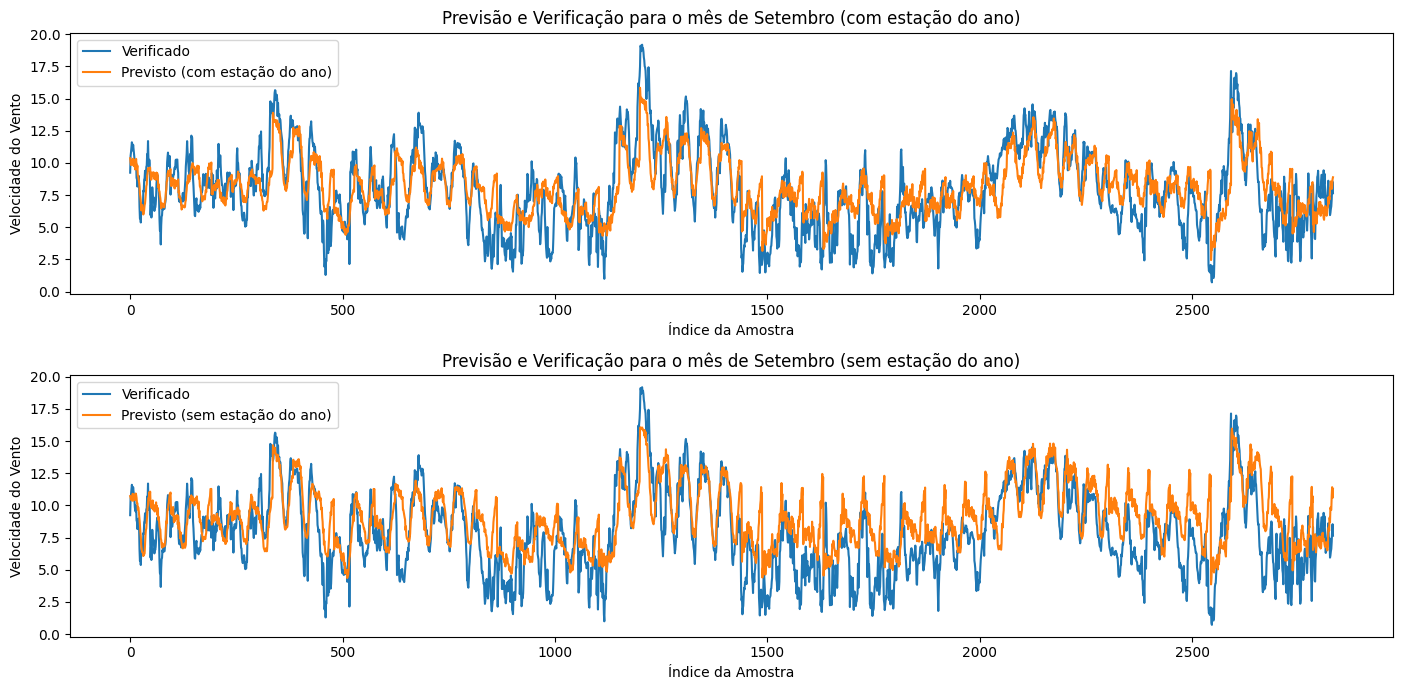

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Função para calcular NMAPE
def nmape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Leitura dos dados
df = pd.read_csv('dados_usina_caetite2_tratados.csv')


# Normalização dos dados de velocidade do vento
scaler = MinMaxScaler()
wind_speeds = df.iloc[:, 1:49].values
wind_speeds_scaled = scaler.fit_transform(wind_speeds)

# Codificação one-hot para as estações do ano
encoder = OneHotEncoder(sparse_output=False)
estacoes = encoder.fit_transform(df[['EstacaoAno']])

# Conversão de 'din_medicao' para datetime
df['din_medicao'] = pd.to_datetime(df['din_medicao'], format='%Y%m%d')

# Normalização do dia da coleta
min_date = df['din_medicao'].min()
max_date = df['din_medicao'].max()

# Preparação dos dados para LSTM (com estação do ano)
X_with_season = []
y = []
for i in range(len(wind_speeds_scaled) - 1):
    dia_coleta = df.iloc[i, 0]
    dia_coleta_normalizado = (dia_coleta - min_date).days / (max_date - min_date).days
    features_with_season = np.concatenate([wind_speeds_scaled[i], estacoes[i], [dia_coleta_normalizado]])
    X_with_season.append(features_with_season)
    y.append(wind_speeds_scaled[i + 1])

X_with_season = np.array(X_with_season, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Divisão dos dados em treino e teste
X_train_with_season, X_test_with_season, y_train, y_test = train_test_split(X_with_season, y, test_size=0.5, shuffle=False)

# Ajuste das dimensões para o modelo LSTM
X_train_with_season = X_train_with_season.reshape((X_train_with_season.shape[0], 1, X_train_with_season.shape[1]))
X_test_with_season = X_test_with_season.reshape((X_test_with_season.shape[0], 1, X_test_with_season.shape[1]))

# Construção do modelo LSTM com estação do ano
# Alteração da função de ativação (relu -> tanh) e aumento do número de épocas
model_with_season = Sequential()
model_with_season.add(LSTM(50, activation='tanh', input_shape=(1, X_train_with_season.shape[2])))
model_with_season.add(Dense(48))
model_with_season.compile(optimizer='adam', loss='mse')

# Treinamento do modelo com estação do ano
model_with_season.fit(X_train_with_season, y_train, epochs=100, batch_size=32, verbose=2)

# Previsão com estação do ano
y_pred_with_season = model_with_season.predict(X_test_with_season)

# Transformação inversa para os valores originais
y_pred_with_season_inv = scaler.inverse_transform(y_pred_with_season)
y_test_inv = scaler.inverse_transform(y_test)

# Preparação dos dados para LSTM (sem estação do ano)
X_without_season = []
for i in range(len(wind_speeds_scaled) - 1):
    dia_coleta = df.iloc[i, 0]
    dia_coleta_normalizado = (dia_coleta - min_date).days / (max_date - min_date).days
    features_without_season = np.concatenate([wind_speeds_scaled[i], [dia_coleta_normalizado]])
    X_without_season.append(features_without_season)

X_without_season = np.array(X_without_season, dtype=np.float32)

# Divisão dos dados em treino e teste
X_train_without_season, X_test_without_season, _, _ = train_test_split(X_without_season, y, test_size=0.5, shuffle=False)

# Ajuste das dimensões para o modelo LSTM
X_train_without_season = X_train_without_season.reshape((X_train_without_season.shape[0], 1, X_train_without_season.shape[1]))
X_test_without_season = X_test_without_season.reshape((X_test_without_season.shape[0], 1, X_test_without_season.shape[1]))

# Construção do modelo LSTM sem estação do ano
model_without_season = Sequential()
model_without_season.add(LSTM(50, activation='tanh', input_shape=(1, X_train_without_season.shape[2])))
model_without_season.add(Dense(48))
model_without_season.compile(optimizer='adam', loss='mse')

# Treinamento do modelo sem estação do ano
model_without_season.fit(X_train_without_season, y_train, epochs=100, batch_size=32, verbose=2)

# Previsão sem estação do ano
y_pred_without_season = model_without_season.predict(X_test_without_season)

# Transformação inversa para os valores originais
y_pred_without_season_inv = scaler.inverse_transform(y_pred_without_season)

# Cálculo dos erros
mse_with_season = mean_squared_error(y_test_inv, y_pred_with_season_inv)
mape_with_season = mean_absolute_percentage_error(y_test_inv, y_pred_with_season_inv)
nmape_with_season = nmape(y_test_inv, y_pred_with_season_inv)

mse_without_season = mean_squared_error(y_test_inv, y_pred_without_season_inv)
mape_without_season = mean_absolute_percentage_error(y_test_inv, y_pred_without_season_inv)
nmape_without_season = nmape(y_test_inv, y_pred_without_season_inv)

# Exibindo os erros
print("Erro com Estação do Ano:")
print(f"MSE: {mse_with_season}")
print(f"MAPE: {mape_with_season}")
print(f"NMAPE: {nmape_with_season}")

print("\nErro sem Estação do Ano:")
print(f"MSE: {mse_without_season}")
print(f"MAPE: {mape_without_season}")
print(f"NMAPE: {nmape_without_season}")

# Plotagem dos resultados
plt.figure(figsize=(14, 7))

# Comparação do modelo com estação do ano
plt.subplot(2, 1, 1)
plt.plot(range(len(y_test_inv.flatten())), y_test_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_with_season_inv.flatten())), y_pred_with_season_inv.flatten(), label='Previsto (com estação do ano)')
plt.legend()
plt.title('Comparação: Previsão com Estação do Ano')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

# Comparação do modelo sem estação do ano
plt.subplot(2, 1, 2)
plt.plot(range(len(y_test_inv.flatten())), y_test_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_without_season_inv.flatten())), y_pred_without_season_inv.flatten(), label='Previsto (sem estação do ano)')
plt.legend()
plt.title('Comparação: Previsão sem Estação do Ano')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

plt.tight_layout()
plt.show()

# Filtragem dos dados para o mês de Setembro
df_september = df[df['din_medicao'].dt.month == 9]

# Preparação dos dados para o mês de Setembro
X_september_with_season = []
X_september_without_season = []
y_september = []
for i in range(len(df_september) - 1):
    dia_coleta = df_september.iloc[i, 0]
    dia_coleta_normalizado = (dia_coleta - min_date).days / (max_date - min_date).days
    features_with_season = np.concatenate([wind_speeds_scaled[i], estacoes[i], [dia_coleta_normalizado]])
    features_without_season = np.concatenate([wind_speeds_scaled[i], [dia_coleta_normalizado]])
    X_september_with_season.append(features_with_season)
    X_september_without_season.append(features_without_season)
    y_september.append(wind_speeds_scaled[i + 1])

X_september_with_season = np.array(X_september_with_season, dtype=np.float32)
X_september_without_season = np.array(X_september_without_season, dtype=np.float32)
y_september = np.array(y_september, dtype=np.float32)

# Ajuste das dimensões para o modelo LSTM
X_september_with_season = X_september_with_season.reshape((X_september_with_season.shape[0], 1, X_september_with_season.shape[1]))
X_september_without_season = X_september_without_season.reshape((X_september_without_season.shape[0], 1, X_september_without_season.shape[1]))

# Previsão para o mês de Setembro com estação do ano
y_pred_september_with_season = model_with_season.predict(X_september_with_season)

# Previsão para o mês de Setembro sem estação do ano
y_pred_september_without_season = model_without_season.predict(X_september_without_season)

# Transformação inversa para os valores originais
y_pred_september_with_season_inv = scaler.inverse_transform(y_pred_september_with_season)
y_pred_september_without_season_inv = scaler.inverse_transform(y_pred_september_without_season)
y_september_inv = scaler.inverse_transform(y_september)

# Cálculo dos erros para o mês de Setembro
mse_september_with_season = mean_squared_error(y_september_inv, y_pred_september_with_season_inv)
mape_september_with_season = mean_absolute_percentage_error(y_september_inv, y_pred_september_with_season_inv)
nmape_september_with_season = nmape(y_september_inv, y_pred_september_with_season_inv)

mse_september_without_season = mean_squared_error(y_september_inv, y_pred_september_without_season_inv)
mape_september_without_season = mean_absolute_percentage_error(y_september_inv, y_pred_september_without_season_inv)
nmape_september_without_season = nmape(y_september_inv, y_pred_september_without_season_inv)

# Exibindo os erros para o mês de Setembro
print("\nErro para o mês de Setembro com Estação do Ano:")
print(f"MSE: {mse_september_with_season}")
print(f"MAPE: {mape_september_with_season}")
print(f"NMAPE: {nmape_september_with_season}")

print("\nErro para o mês de Setembro sem Estação do Ano:")
print(f"MSE: {mse_september_without_season}")
print(f"MAPE: {mape_september_without_season}")
print(f"NMAPE: {nmape_september_without_season}")

# Plotagem dos resultados para Setembro com estação do ano
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(range(len(y_september_inv.flatten())), y_september_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_september_with_season_inv.flatten())), y_pred_september_with_season_inv.flatten(), label='Previsto (com estação do ano)')
plt.legend()
plt.title('Previsão e Verificação para o mês de Setembro (com estação do ano)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

# Plotagem dos resultados para Setembro sem estação do ano
plt.subplot(2, 1, 2)
plt.plot(range(len(y_september_inv.flatten())), y_september_inv.flatten(), label='Verificado')
plt.plot(range(len(y_pred_september_without_season_inv.flatten())), y_pred_september_without_season_inv.flatten(), label='Previsto (sem estação do ano)')
plt.legend()
plt.title('Previsão e Verificação para o mês de Setembro (sem estação do ano)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Velocidade do Vento')

plt.tight_layout()
plt.show()